In [1]:
import pandas #ipython notebook
import numpy as np
titanic = pandas.read_csv("titanic_train.csv")
titanic.head(5)
#print (titanic.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
for col in titanic.columns:
    print(len(titanic[col].unique()))

891
2
3
891
2
89
7
7
681
248
148
4


In [5]:
for col in titanic.columns:
    print(col,len(titanic[col][titanic[col].isnull()]))

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [6]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
print (titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print (titanic["Sex"].unique())

# Replace all the occurences of male with the number 0.
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1


['male' 'female']


In [8]:
print (titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [9]:
titanic.shape

(891, 12)

In [10]:
# for train, test in kf.split(titanic):
#     print(train,test)

In [11]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.model_selection import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
# kf = KFold(n_splits=3, random_state=1)
kf = KFold(n_splits=3,shuffle=False, random_state=1)
predictions = []
for train, test in kf.split(titanic):
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = titanic["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [12]:
predictions

[array([ 8.99877810e-02,  9.60756206e-01,  5.92676278e-01,  9.31138728e-01,
         5.29343071e-02,  1.70275685e-01,  3.69943590e-01,  1.03474847e-01,
         5.21597906e-01,  8.74491050e-01,  6.48883611e-01,  8.29742769e-01,
         1.34797198e-01, -1.61126844e-01,  6.58141307e-01,  6.39819748e-01,
         1.51733875e-01,  2.95432718e-01,  5.35377959e-01,  6.21007683e-01,
         2.61872592e-01,  2.62687561e-01,  7.31739160e-01,  5.05995897e-01,
         5.61398567e-01,  3.35039734e-01,  1.30338808e-01,  4.68765767e-01,
         6.60737753e-01,  9.10819218e-02,  4.77223920e-01,  1.04220026e+00,
         6.60691613e-01,  8.71539273e-02,  5.28550732e-01,  4.01874338e-01,
         1.30340307e-01,  1.29339672e-01,  5.72717129e-01,  6.65238822e-01,
         4.83215779e-01,  7.60807408e-01,  1.30578363e-01,  8.71867121e-01,
         7.09855487e-01,  9.11369897e-02,  1.39181745e-01,  6.60691613e-01,
         6.82833485e-02,  6.06254374e-01,  4.92254383e-02,  1.29250392e-01,
         9.0

In [13]:
# predictions = np.concatenate(predictions, axis=0)

In [14]:
predictions

[array([ 8.99877810e-02,  9.60756206e-01,  5.92676278e-01,  9.31138728e-01,
         5.29343071e-02,  1.70275685e-01,  3.69943590e-01,  1.03474847e-01,
         5.21597906e-01,  8.74491050e-01,  6.48883611e-01,  8.29742769e-01,
         1.34797198e-01, -1.61126844e-01,  6.58141307e-01,  6.39819748e-01,
         1.51733875e-01,  2.95432718e-01,  5.35377959e-01,  6.21007683e-01,
         2.61872592e-01,  2.62687561e-01,  7.31739160e-01,  5.05995897e-01,
         5.61398567e-01,  3.35039734e-01,  1.30338808e-01,  4.68765767e-01,
         6.60737753e-01,  9.10819218e-02,  4.77223920e-01,  1.04220026e+00,
         6.60691613e-01,  8.71539273e-02,  5.28550732e-01,  4.01874338e-01,
         1.30340307e-01,  1.29339672e-01,  5.72717129e-01,  6.65238822e-01,
         4.83215779e-01,  7.60807408e-01,  1.30578363e-01,  8.71867121e-01,
         7.09855487e-01,  9.11369897e-02,  1.39181745e-01,  6.60691613e-01,
         6.82833485e-02,  6.06254374e-01,  4.92254383e-02,  1.29250392e-01,
         9.0

In [15]:
import numpy as np

# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
# accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
accuracy = sum(predictions==titanic['Survived'])/len(predictions)
print (accuracy)

0.7833894500561167


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7957351290684623


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
titanic_test = pandas.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)


kf = KFold(n_splits=3, shuffle=False, random_state=1)
scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7856341189674523


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [19]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
kf = KFold(n_splits=3, shuffle=False, random_state=1)
scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8148148148148148


## 特征重要性衡量

通过上面可以发现准确率有小幅提升，但是似乎得到的结果还是不太理想。我们可以发现模型似乎优化的差不多了，使用的特征似乎也已经使用完了。准确率已经达到了瓶颈，但是如果我们还想提高精度的话，还是要回到最原始的数据集里面。对分类器的结果最大的影响还是输入的数据本身。接下来采用的方法一般是从原始的数据集里面构造出新的特征。新增特征，家庭成员数和名字长度。

In [20]:
# Generating a familysize column
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [21]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pandas.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Countess      1
Ms            1
Jonkheer      1
Capt          1
Sir           1
Don           1
Lady          1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [22]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,23,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,51,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,44,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,0,21,6
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,28,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0,3,40,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,21,1


In [23]:
# import numpy as np
# from sklearn.feature_selection import SelectKBest, f_classif
# import matplotlib.pyplot as plt
# predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# # Perform feature selection
# selector = SelectKBest(f_classif, k=5)
# selector.fit(titanic[predictors], titanic["Survived"])

# # Get the raw p-values for each feature, and transform from p-values into scores
# scores = -np.log10(selector.pvalues_)

# # Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
# plt.bar(range(len(predictors)), scores)
# plt.xticks(range(len(predictors)), predictors, rotation='vertical')
# plt.show()

# # Pick only the four best features.
# predictors = ["Pclass", "Sex", "Fare", "Title"]

# alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [24]:
import re
 
 
# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.
    # Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [25]:
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Countess      1
Ms            1
Jonkheer      1
Capt          1
Sir           1
Don           1
Lady          1
Name: Name, dtype: int64


In [26]:
# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Dr": 5,
    "Rev": 6,
    "Major": 7,
    "Col": 7,
    "Mlle": 8,
    "Mme": 8,
    "Don": 9,
    "Lady": 10,
    "Countess": 10,
    "Jonkheer": 10,
    "Sir": 9,
    "Capt": 7,
    "Ms": 2
}
for k, v in title_mapping.items():
    titles[titles == k] = v
 
# Verify that we converted everything.
# 验证我们是否转换了所有内容
print(pandas.value_counts(titles))
 
# Add in the title column.
titanic["Title"] = titles

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


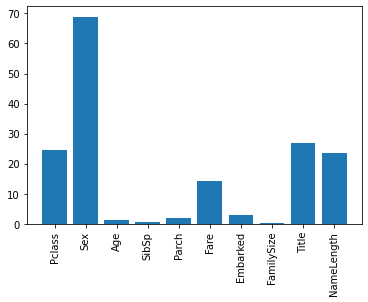

In [28]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif # 选择最好特征
import matplotlib.pyplot as plt
predictors = [
    "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize",
    "Title", "NameLength"
]
 
# Perform feature selection
# 执行特征选择
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])
 
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
 
# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()
 
# Pick only the four best features.
# 只选择4个最好的特征
predictors = ["Pclass", "Sex", "Fare", "Title"]
 
alg = RandomForestClassifier(random_state=1,
                             n_estimators=50,
                             min_samples_split=8,
                             min_samples_leaf=4)

In [29]:
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title.
print(pandas.value_counts(titanic_test["Title"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]



1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
 
# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(random_state=1,solver='liblinear'), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
 
# Initialize the cross validation folds
kf = KFold(n_splits=3,shuffle=False, random_state=1)
 
predictions = []
for train, test in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold. 
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2  # 两个分类器的平均结果
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
 
# Put all the predictions together into one array.
# 将所有的预测放在一个数组中
predictions = np.concatenate(predictions, axis=0)
 
# Compute accuracy by comparing to the training data.
accuracy = sum(predictions == titanic["Survived"]) / len(predictions)
print(accuracy)

0.8215488215488216


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [32]:
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Dr": 5,
    "Rev": 6,
    "Major": 7,
    "Col": 7,
    "Mlle": 8,
    "Mme": 8,
    "Don": 9,
    "Lady": 10,
    "Countess": 10,
    "Jonkheer": 10,
    "Sir": 9,
    "Capt": 7,
    "Ms": 2,
    "Dona": 10
}
for k, v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title.
print(pandas.value_counts(titanic_test["Title"]))
 
# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64


In [33]:
predictors = [
    "Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"
]
 
algorithms = [
    [
        GradientBoostingClassifier(random_state=1,
                                   n_estimators=25,
                                   max_depth=3), predictors
    ],
    [
        LogisticRegression(random_state=1, solver='liblinear'),
        ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]
    ]
]
 
full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(
        titanic_test[predictors].astype(float))[:, 1]
    predictions[predictions <= .5] = 0
    predictions[predictions > .5] = 1
    full_predictions.append(predictions)
 
# The gradient boosting classifier generates better predictions, so we weight it higher.
# predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [30]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.11608616, 0.47313163, 0.12527406, 0.1305029 , 0.52004311,
       0.14392415, 0.63984341, 0.18138299, 0.6778233 , 0.12095368,
       0.12054308, 0.21154493, 0.91148439, 0.10814111, 0.89180609,
       0.87818912, 0.1650196 , 0.13910405, 0.53990168, 0.551889  ,
       0.22474624, 0.53695164, 0.90686439, 0.39533671, 0.88099058,
       0.10288684, 0.9105501 , 0.13737153, 0.31376951, 0.12631623,
       0.11615631, 0.18430576, 0.54919197, 0.49415142, 0.42910391,
       0.14215743, 0.50825223, 0.52417057, 0.13230705, 0.28222509,
       0.11076129, 0.47224517, 0.09914069, 0.83492474, 0.90028243,
       0.14946376, 0.31905677, 0.1375202 , 0.89021873, 0.53830769,
       0.36218205, 0.17945767, 0.83411368, 0.87864985, 0.17768223,
       0.13743949, 0.10594413, 0.12307288, 0.12054944, 0.912131  ,
       0.13115382, 0.15454243, 0.13002401, 0.66586834, 0.66161484,
       0.87338585, 0.67298304, 0.29010609, 0.35826283, 0.84875193,
       0.6621158 , 0.12688447, 0.55224753, 0.37379733, 0.91064